# K Clustering Analysis on Combined Arrays

We will perform a K Cluster analysis on the combined data. First we apply principle component analysis (PCA) on the data to reduce the data from 12 dimensions to 2, to visualize the 2 dimensional floor mapping. For now, we will assume there is a single source producing data points.

## Imports

In [227]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
import glob

## clean_data
clean_data takes the path to the combined data file as a string. It parses .csv file and organizes it into a 12 dimension numpy array. clean_data makes the assumption that there is a single source. Dimensions 0-2 are array 0's xyz values.<br>Dimensions 3-5 are array 1's xyz values. <br>Dimensions 6-8 are array 2's xyz values. <br>Dimensions 9-11 are array 3's xyz values.

In [40]:
def clean_data(path):
    data = pd.read_csv(path)
    
    combined = np.empty([(int)(len(data)/6), 12])
    
    #assuming there in only 1 source
    data_index = 0
    combined_index = 0
    
    while(data_index + 5 <= len(data)):

        f0 = (data.iloc[data_index]['xyz 1'][1:data.iloc[data_index]['xyz 1'].find(',')])
        f1 = (data.iloc[data_index]['xyz 1'][data.iloc[data_index]['xyz 1'].find(' ') + 1:data.iloc[data_index]['xyz 1'].rfind(',')])
        f2 = (data.iloc[data_index]['xyz 1'][data.iloc[data_index]['xyz 1'].rfind(' ') + 1:data.iloc[data_index]['xyz 1'].find(']')])
        f3 = (data.iloc[data_index]['xyz 2'][1:data.iloc[data_index]['xyz 2'].find(',')])
        f4 = (data.iloc[data_index]['xyz 2'][data.iloc[data_index]['xyz 2'].find(' ') + 1:data.iloc[data_index]['xyz 2'].rfind(',')])
        f5 = (data.iloc[data_index]['xyz 2'][data.iloc[data_index]['xyz 2'].rfind(' ') + 1:data.iloc[data_index]['xyz 2'].find(']')])     
        f6 = (data.iloc[data_index + 5]['xyz 1'][1:data.iloc[data_index + 5]['xyz 1'].find(',')])
        f7 = (data.iloc[data_index + 5]['xyz 1'][data.iloc[data_index + 5]['xyz 1'].find(' ') + 1:data.iloc[data_index + 5]['xyz 1'].rfind(',')])
        f8 = (data.iloc[data_index + 5]['xyz 1'][data.iloc[data_index + 5]['xyz 1'].rfind(' ') + 1:data.iloc[data_index + 5]['xyz 1'].find(']')])
        f9 = (data.iloc[data_index + 5]['xyz 2'][1:data.iloc[data_index + 5]['xyz 2'].find(',')])
        f10 = (data.iloc[data_index + 5]['xyz 2'][data.iloc[data_index + 5]['xyz 2'].find(' ') + 1:data.iloc[data_index + 5]['xyz 2'].rfind(',')])
        f11 = (data.iloc[data_index + 5]['xyz 2'][data.iloc[data_index + 5]['xyz 2'].rfind(' ') + 1:data.iloc[data_index + 5]['xyz 2'].find(']')])
        
        if(f0 != 'None'):
            f0 = (float(f0))
        else:
            f0 = np.NaN
        if(f1 != 'None'):
            f1 = (float(f1))
        else:
            f1 = np.NaN
        if(f2 != 'None'):
            f2 = (float(f2))
        else:
            f2 = np.NaN
        if(f3 != 'None'):
            f3 = (float(f3))
        else:
            f3 = np.NaN
        if(f4 != 'None'):
            f4 = (float(f4))
        else:
            f4 = np.NaN
        if(f5 != 'None'):
            f5 = (float(f5))
        else:
            f5 = np.NaN
        if(f6 != 'None'):
            f6 = (float(f6))
        else:
            f6 = np.NaN
        if(f7 != 'None'):
            f7 = (float(f7))
        else:
            f7 = np.NaN
        if(f8 != 'None'):
            f8 = (float(f8))
        else:
            f8 = np.NaN
        if(f9 != 'None'):
            f9 = (float(f9))
        else:
            f9 = np.NaN
        if(f10 != 'None'):
            f10 = (float(f10))
        else:
            f10 = np.NaN
        if(f11 != 'None'):
            f11 = (float(f11))
        else:
            f11 = np.NaN
            
        combined[combined_index] = [f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]
        
        combined_index += 1
        data_index += 6
        
    return combined

In [35]:
test_data = clean_data('/Users/ardelalegre/CSE4223-ODAS/data/combined/recordingWednesday, March 25, 2020 01:05:3_0.csv')
test_data = np.append(test_data, clean_data('/Users/ardelalegre/CSE4223-ODAS/data/combined/recordingWednesday, March 25, 2020 01:05:3_0.csv'), axis=0)

In [36]:
test_data.shape

(16668, 12)

In [16]:
data = clean_data('/Volumes/Extreme SSD/ODAS_data/hour0jan8/temp1.csv')

In [31]:
real_data = real_data[~np.isnan(real_data).all(axis = 1)]

In [50]:
data = np.empty((0,12))
dat = np.append(data, real_data, axis = 0)

In [51]:
data = np.empty((0, 12))
for i in range(12):
    print("Starting Hour " + str(i))
    for filename in glob.glob("/Volumes/Extreme SSD/ODAS_data/hour" + str(i) + "jan8/*.csv"):
        print("File: " + filename)
        temp = clean_data(filename)
        temp = temp[~np.isnan(temp).all(axis = 1)]
        data = np.append(data, temp, axis = 0)

Starting Hour 0
File: /Volumes/Extreme SSD/ODAS_data/hour0jan8/temp1.csv
File: /Volumes/Extreme SSD/ODAS_data/hour0jan8/temp0.csv
File: /Volumes/Extreme SSD/ODAS_data/hour0jan8/temp2.csv
File: /Volumes/Extreme SSD/ODAS_data/hour0jan8/temp3.csv
File: /Volumes/Extreme SSD/ODAS_data/hour0jan8/temp4.csv
File: /Volumes/Extreme SSD/ODAS_data/hour0jan8/temp5.csv
Starting Hour 1
File: /Volumes/Extreme SSD/ODAS_data/hour1jan8/temp1.csv
File: /Volumes/Extreme SSD/ODAS_data/hour1jan8/temp0.csv
File: /Volumes/Extreme SSD/ODAS_data/hour1jan8/temp2.csv
Starting Hour 2
File: /Volumes/Extreme SSD/ODAS_data/hour2jan8/temp0.csv
Starting Hour 3
File: /Volumes/Extreme SSD/ODAS_data/hour3jan8/temp0.csv
Starting Hour 4
File: /Volumes/Extreme SSD/ODAS_data/hour4jan8/temp1.csv
File: /Volumes/Extreme SSD/ODAS_data/hour4jan8/temp0.csv
File: /Volumes/Extreme SSD/ODAS_data/hour4jan8/temp2.csv
Starting Hour 5
File: /Volumes/Extreme SSD/ODAS_data/hour5jan8/temp1.csv
File: /Volumes/Extreme SSD/ODAS_data/hour5jan8/te

In [175]:
one = 0
two = 0
three = 0
four = 0
new_col = np.zeros((len(data), 1))
data = np.append(data, new_col, 1)
for i in range(len(data)):
    count = 0
    for j in data[i]:
        if(np.isnan(j)):
            count += 1
    if(count == 0):
        four += 1
        data[i][12] = 4
    elif(count == 3):
        three += 1
        data[i][12] = 3
    elif(count == 6):
        two += 1
        data[i][12] = 2
    else:
        one += 1
        data[i][12] = 1

## Pair Analysis

In [176]:
pair = data[data[:, 12] == 2]

In [220]:
pair_12 = np.zeros((0, 6))
pair_13 = np.zeros((0, 6))
pair_14 = np.zeros((0, 6))
pair_23 = np.zeros((0, 6))
pair_24 = np.zeros((0, 6))
pair_34 = np.zeros((0, 6))
for i in range(len(pair)):
    #12
    if(~np.isnan(pair[i, 0]) and ~np.isnan(pair[i, 3])):
        pair[i, 12] = 12
        temp = pair[i][~np.isnan(pair[i])]
        pair_12 = np.append(pair_12, np.array([temp[:6]]), axis = 0)
    #13
    elif(~np.isnan(pair[i, 0]) and ~np.isnan(pair[i, 6])):
        pair[i, 12] = 13
        temp = pair[i][~np.isnan(pair[i])]
        pair_13 = np.append(pair_13, np.array([temp[:6]]), axis = 0)
    #14
    elif(~np.isnan(pair[i, 0]) and ~np.isnan(pair[i, 9])):
        pair[i, 12] = 14
        temp = pair[i][~np.isnan(pair[i])]
        pair_14 = np.append(pair_14, np.array([temp[:6]]), axis = 0)
    #23
    elif(~np.isnan(pair[i, 3]) and ~np.isnan(pair[i, 6])):
        pair[i, 12] = 23
        temp = pair[i][~np.isnan(pair[i])]
        pair_23 = np.append(pair_23, np.array([temp[:6]]), axis = 0)
    #24
    elif(~np.isnan(pair[i, 3]) and ~np.isnan(pair[i, 9])):
        pair[i, 12] = 24
        temp = pair[i][~np.isnan(pair[i])]
        pair_24 = np.append(pair_24, np.array([temp[:6]]), axis = 0)
    #34
    elif(~np.isnan(pair[i, 6]) and ~np.isnan(pair[i, 9])):
        i[12] = 34
        temp = pair[i][~np.isnan(pair[i])]
        pair_34 = np.append(pair_34, np.array([temp[:6]]), axis = 0)

In [221]:
print(pair_12.shape)
print(pair_13.shape)
print(pair_14.shape)
print(pair_23.shape)
print(pair_24.shape)
print(pair_34.shape)

(0, 6)
(107011, 6)
(0, 6)
(90253, 6)
(0, 6)
(0, 6)


### Cluster Analysis for Array Pairs 0 and 2

In [222]:
#PCA Transform to 2D
pca13 = decomposition.PCA(n_components=2)
pca.fit(pair_13)
data_13_2D = pca.fit_transform(pair_13) 

pca23 = decomposition.PCA(n_components=2)
pca.fit(pair_23)
data_23_2D = pca.fit_transform(pair_23) 

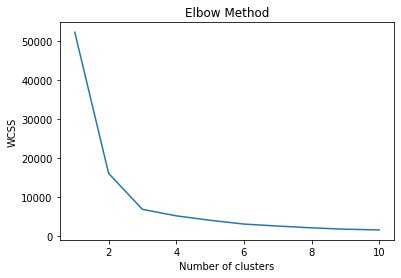

In [242]:
#13
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_13_2D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

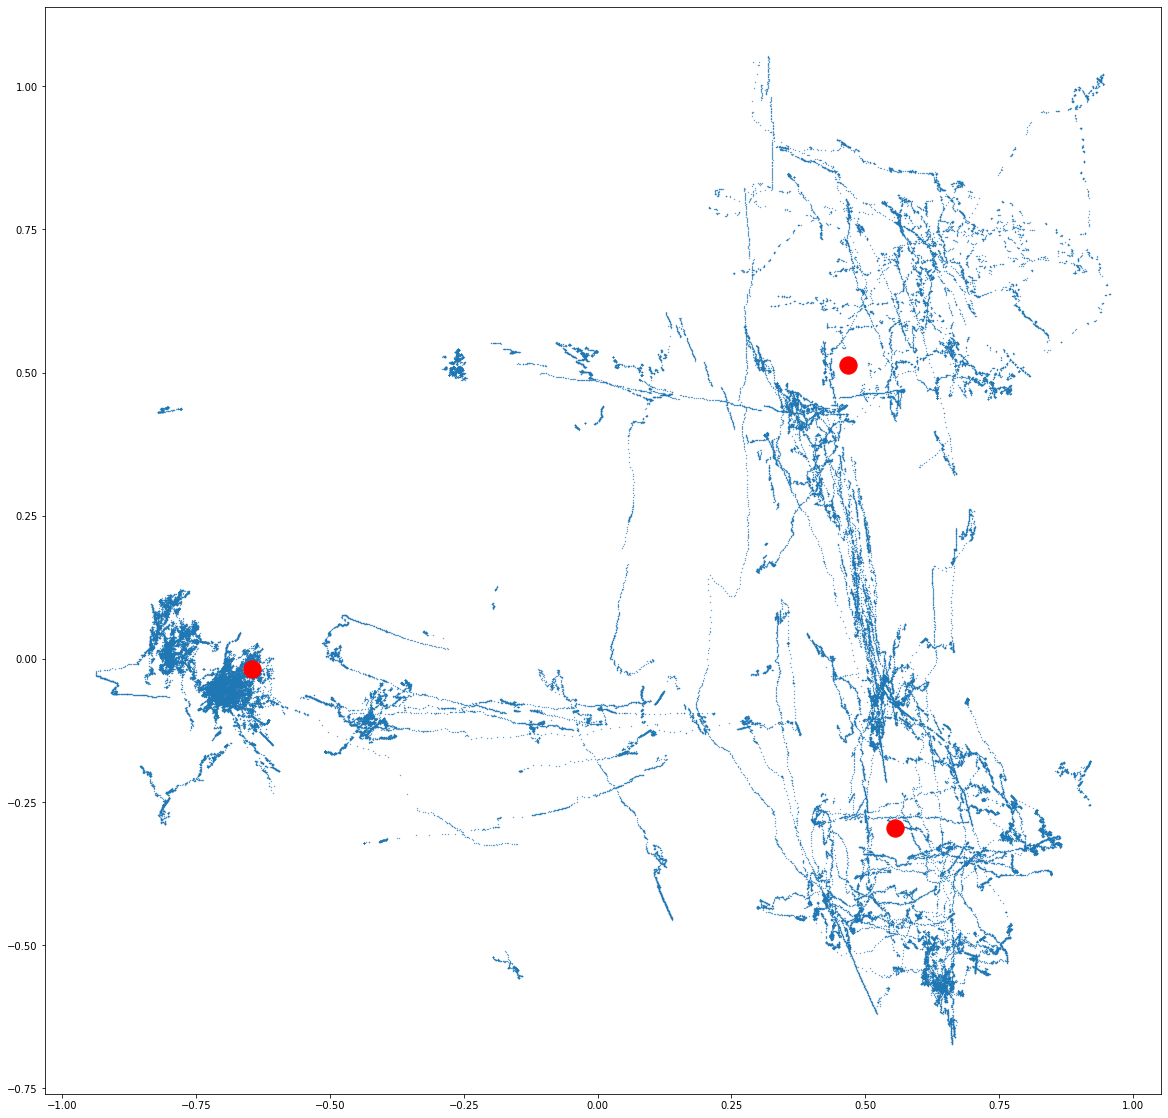

In [241]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_13_2D)
plt.figure(figsize=(20,20))
plt.scatter(data_13_2D[:,0], data_13_2D[:,1], s = .1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
#plt.figure(figsize = (50,10))
plt.show()

### Cluster Analysis for Array Pairs 1 and 2

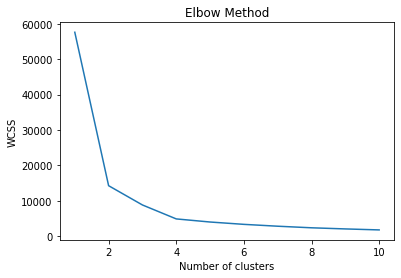

In [225]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_23_2D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

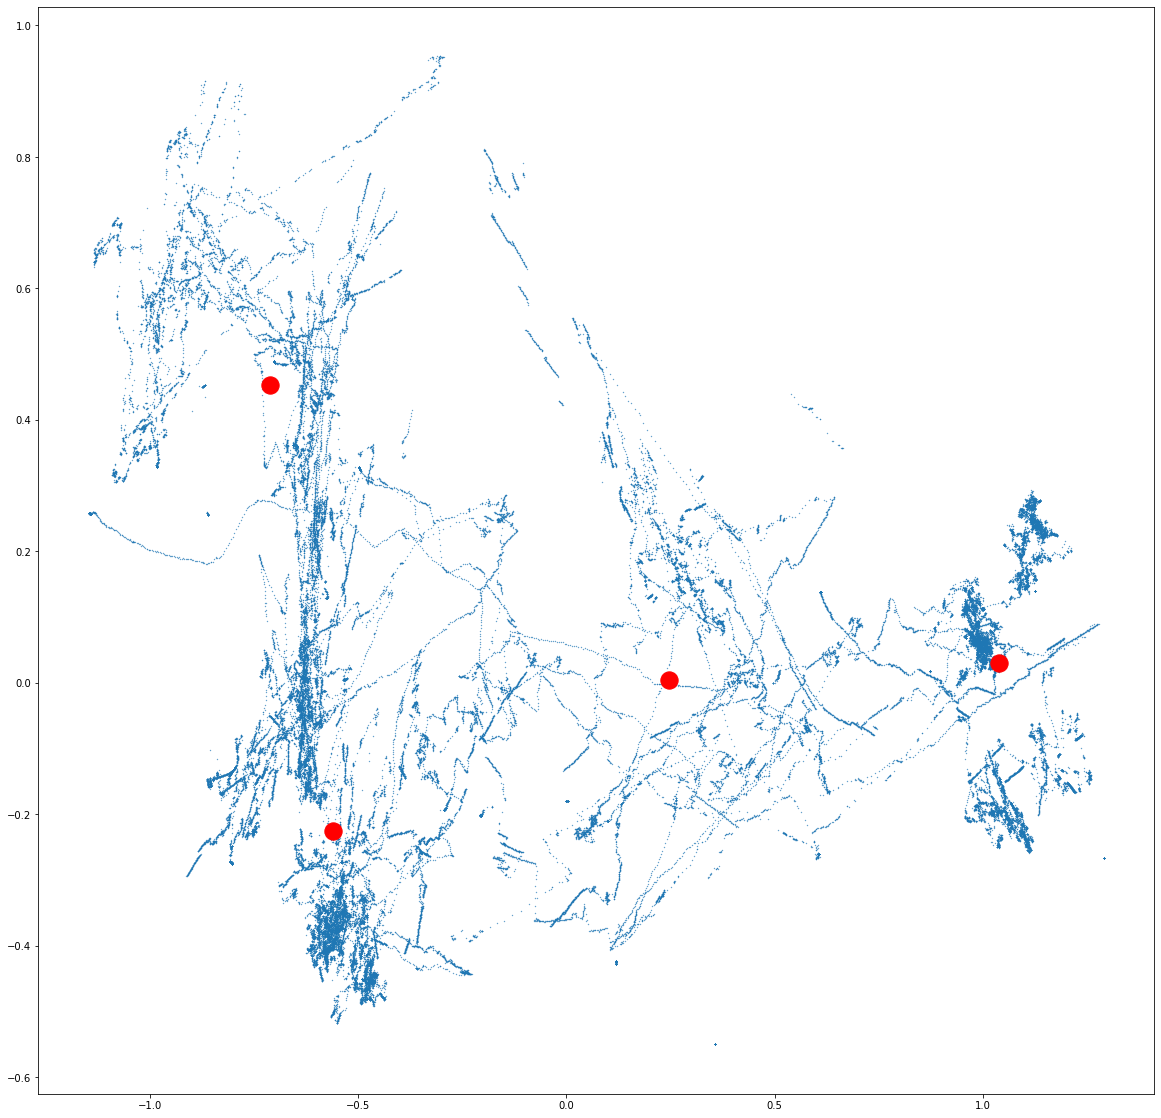

In [243]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_23_2D)
plt.figure(figsize=(20,20))
plt.scatter(data_23_2D[:,0], data_23_2D[:,1], s = .1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Ignore Below

## PCA Transform

In [53]:
pca = decomposition.PCA(n_components=2)
pca.fit(data)
data_2D = pca.fit_transform(data) 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [106]:
data_2D.shape

(16668, 2)

## K Cluster Analysis

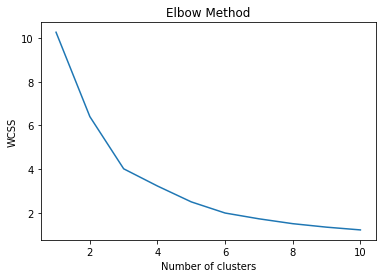

In [104]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_2D)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

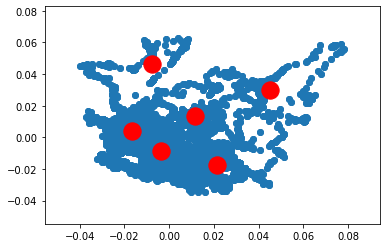

In [105]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(data_2D)
plt.scatter(data_2D[:,0], data_2D[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()